# Overview of the Equity-Bond Relationship

The relationship between equities (e.g., stocks like the S&P 500) and bonds (e.g., 10-year Treasury yields, TNX) has long been a critical area of research and analysis in financial markets. These two asset classes often exhibit dynamic correlations that depend on prevailing macroeconomic conditions such as **inflation, interest rates, and monetary policy**. Understanding the interplay between equities and bonds is crucial for investors, policymakers, and risk managers.

## Key Dynamics of the Relationship

### Positive Correlation (Economic Growth Periods)
During periods of **economic growth**, equities and bonds tend to be **positively correlated**. Higher bond yields often reflect a strong economy, with investors demanding higher returns for longer-term investments. This optimism typically leads to rising stock prices, as corporate profits and consumer demand improve.

For example:
- **2003–2007**: During the recovery from the dot-com bubble, bond yields and equities rose together, reflecting economic expansion.

### Negative Correlation (Economic Stress or Inflation)
In contrast, periods of **economic stress** or **rising inflation** often lead to a **negative correlation** between equities and bonds. Rising bond yields in such environments may signal expectations of higher inflation or tighter monetary policy, which increases the cost of capital and dampens equity valuations.

For example:
- **2022**: Bond yields surged as central banks tightened monetary policy to combat inflation, leading to declining equity valuations.

## Why is the 5% Yield Threshold Critical?

The 5% yield threshold for 10-year Treasury bonds is considered a **psychological and economic inflection point** for the following reasons:

1. **Historical Context**:
   - Over the last three decades, the U.S. economy has rarely seen 10-year Treasury yields sustain levels above 5%. For much of the post-2008 era, yields hovered below 3%, making 5% a notable benchmark for tighter monetary conditions.
   - Periods with yields above 5% often align with heightened inflation or aggressive Federal Reserve rate hikes.

2. **Impact on Borrowing Costs**:
   - A 5% yield on Treasuries typically leads to higher borrowing costs for corporations and consumers. Mortgage rates, corporate bond yields, and credit spreads often increase, slowing economic activity.
   - Equities, which are sensitive to the discount rate used in valuation models, tend to decline as bond yields cross this threshold.

3. **Risk-Free Alternative**:
   - At 5%, Treasury bonds become a highly attractive **risk-free alternative** to equities. Investors may prefer locking in a 5% return with little risk over investing in volatile equity markets, leading to capital outflows from stocks.

4. **Historical Market Responses**:
   - Analysis of historical data suggests that equity performance tends to weaken when 10-year yields consistently exceed 5%. For example:
     - **1980s Volcker Era**: High yields above 5% coincided with falling equity markets due to tight monetary policy.
     - **1994**: Yields briefly exceeded 5%, triggering a bond market sell-off and equity market weakness.

## Broader Implications of the Equity-Bond Relationship

### Portfolio Diversification
Traditionally, bonds and equities serve as complementary asset classes. When equities decline, bonds are expected to rise in value, providing diversification benefits. However, during periods of synchronized declines (e.g., 2022), this relationship breaks down, exposing portfolios to higher risks.

### Risk Management
Understanding when equities and bonds are positively or negatively correlated allows for more robust risk management. A breakdown in their relationship, such as both declining simultaneously, signals potential market dislocations or systemic risks.

### Policy Analysis
Policymakers closely monitor the equity-bond relationship as it reflects market expectations for inflation and monetary policy. For example, the Federal Reserve may interpret rising yields and falling equities as a sign that tighter monetary conditions are effectively slowing the economy.

## Conclusion
The equity-bond relationship is a cornerstone of financial analysis, offering insights into the health of the economy, the effectiveness of monetary policy, and the behavior of investors. The 5% yield threshold for 10-year Treasury bonds serves as a critical level, influencing equity valuations, capital flows, and market sentiment. Understanding this dynamic relationship is essential for navigating modern financial markets.


# Cell 1: Import Libraries

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Cell 2: Define the Function to Fetch Data

In [20]:
# Fetch historical data for 10-year bond yields (TNX) and S&P 500 (SPY)
def fetch_data(tickers, start_date, end_date):
    all_data = []
    for ticker in tickers:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        # Use 'Adj Close' if available, otherwise 'Close'
        if 'Adj Close' in stock_data.columns:
            series = stock_data['Adj Close']
        else:
            series = stock_data['Close']
        series.name = ticker  # Set the column name directly
        all_data.append(series)
    # Combine into a single DataFrame and align by date
    combined_data = pd.concat(all_data, axis=1)
    return combined_data


Cell 3: Define the Function to Calculate Weekly Correlation

In [21]:
# Calculate weekly percentage changes and rolling correlation
def calculate_weekly_correlation(data, spy_ticker, tnx_ticker, window=52):
    # Resample TNX to weekly frequency (last value of each week)
    weekly_data = data.resample('W').last()
    # Calculate weekly percentage changes for SPY
    weekly_data[spy_ticker] = weekly_data[spy_ticker].pct_change()
    # Calculate rolling correlation between SPY weekly changes and TNX
    correlation = weekly_data[spy_ticker].rolling(window).corr(weekly_data[tnx_ticker])
    correlation.name = "Correlation"  # Assign a name for clarity
    return weekly_data, correlation


Cell 4: Define the Function to Plot and Save the Correlation

In [22]:
# Plot the correlation vs. bond yields and save the plot
def plot_correlation_vs_yield(weekly_data, correlation, bond_ticker, equity_ticker, save_path="correlation_plot.png"):
    # Drop NaN values and align data
    combined = pd.concat([weekly_data[bond_ticker], correlation], axis=1).dropna()
    aligned_tnx = combined[bond_ticker]
    aligned_correlation = combined["Correlation"]

    plt.figure(figsize=(12, 6))

    # Scatter plot
    plt.scatter(aligned_tnx, aligned_correlation, alpha=0.5, color="blue", label="Correlation Data")
    plt.axvline(5, color='red', linestyle='--', label='5% Yield Threshold')

    # Fit and plot trend line
    z = np.polyfit(aligned_tnx, aligned_correlation, 1)
    p = np.poly1d(z)
    plt.plot(aligned_tnx, p(aligned_tnx), color="orange", linewidth=2, label="Trend Line")

    plt.title("Correlation Between TNX and Weekly SPY Changes (Since 1962)")
    plt.xlabel(f"{bond_ticker} (%)")
    plt.ylabel(f"Rolling Correlation ({bond_ticker} & Weekly {equity_ticker} Changes)")
    plt.legend()
    plt.grid(alpha=0.3)

    # Save the plot to a file
    #plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Plot saved to {save_path}")

    # Show the plot
    plt.show()


Cell 5 : Main Workflow

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Plot saved to correlation_plot.png


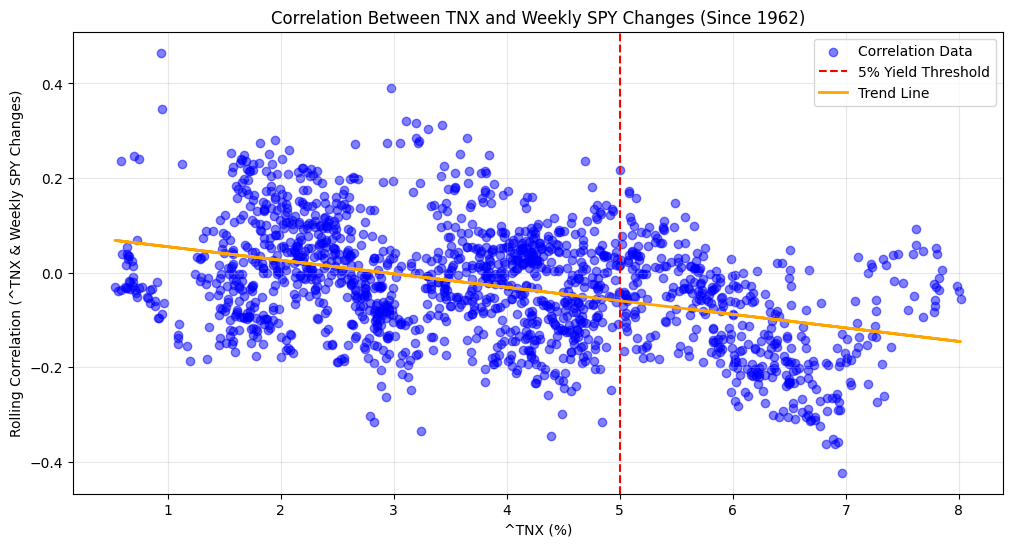

In [23]:
# Parameters
tickers = ["^TNX", "SPY"]
start_date = "1962-01-01"
end_date = "2025-01-01"

# Fetch data
data = fetch_data(tickers, start_date, end_date)

# Drop NaN values
data = data.dropna()

# Calculate weekly rolling correlation
weekly_data, correlation = calculate_weekly_correlation(data, "SPY", "^TNX")

# Plot and save
plot_correlation_vs_yield(weekly_data, correlation, "^TNX", "SPY", save_path="correlation_plot.png")


## Sample Reference Studies

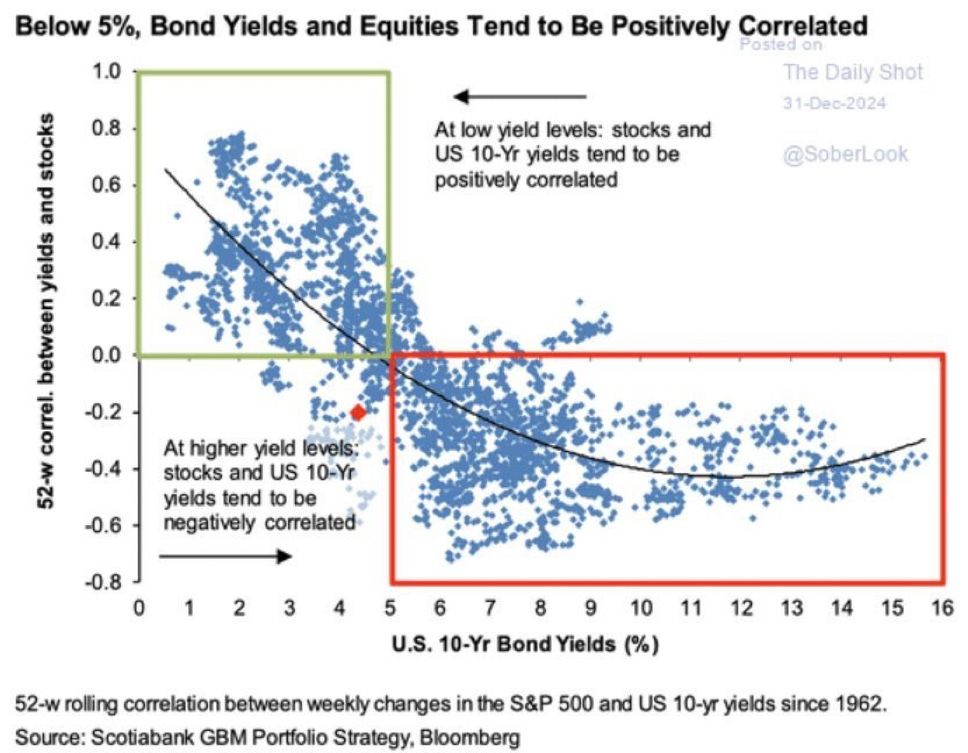

In [24]:
from IPython.display import Image, display

# Display an image from a local file
display(Image(filename='Spy_BondYield_Correlation_Boomberg_Study.jpeg'))


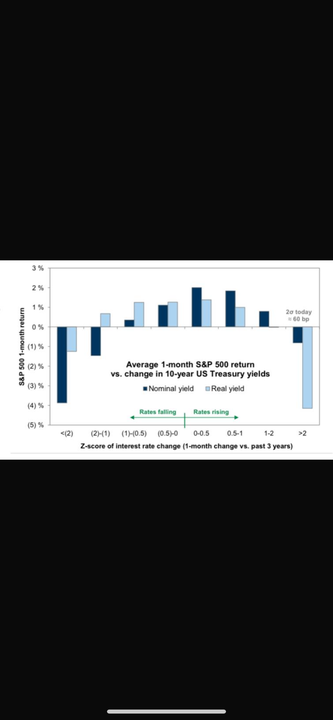

In [25]:

from IPython.display import Image, display

# Display an image from a local file
display(Image(filename='Relation_SPY_ty_1month_return.png'))